In [2]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import SGD, Adam
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
'定義子資料夾名稱&對應的數字，檔名不能有中文'
class_names = ['Brown-Headed Barbet','Buffalo','butterfly','cat','Cattle Egret','chicken','Common Kingfisher','Common Myna','Common Rosefinch','Common Tailorbird','Coppersmith Barbet','cow','deer','dog','elephant','Forest Wagtail','fox','gharial','Gray Wagtail','Green Bee-Eater','Hoopoe','horse','House Crow','hyena','Indian Grey Hornbill','Indian Pitta','Indian Roller','Jungle Babbler','kangaroo','leopard','lion','Northern Lapwing','pangolin','Peacock','Python','Red-Wattled Lapwing','Rhino','Ruddy Shelduck','Rufous Treepie','Russell\'s Viper','Sarus Crane','shark','sheep','spider','tiger','White Wagtail','White-Breasted Kingfisher','White-Breasted Waterhen','wolf','zebra']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (64, 64)

In [4]:
def load_data():
    datasets = ['training_set', 'test_set']#資料夾
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                try:
                    # Get the path name of the image
                    img_path = os.path.join(os.path.join(dataset, folder), file)

                    # Open and resize the img
                    image = cv2.imread(img_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    #cv讀照片，顏色莫認為BGR，需轉為RGB，錯誤表示黑白或已轉
                    image = cv2.resize(image, IMAGE_SIZE) 

                    # Append the image and its corresponding label to the output
                    images.append(image)
                    labels.append(label)
                except:
                    print(img_path)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [5]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading training_set


100%|█████████████████████████████████████████████████████████████████████████████| 1074/1074 [00:02<00:00, 480.72it/s]


Loading test_set


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 70.65it/s]


In [6]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [7]:
'隨機性'
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
'標準化'
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [8]:
'建模'
input_shape = (64, 64, 3)

model = Sequential([
    Conv2D(128, (3, 3), input_shape=input_shape, padding='same',
           activation='sigmoid', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.25),
    Conv2D(256, (3, 3), input_shape=input_shape, padding='same',
           activation='sigmoid', strides=2),
    Dropout(0.2),
    Conv2D(256, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.15),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.1),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Flatten(),
    Dense(50, activation='softmax') #輸出層，分類用softmax
])
model.compile(optimizer = 'adam', #SGD(lr=0.1)
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(train_images, train_labels, 
                    #validation_data=(test_images, test_labels),
                    #verbose=2,callbacks=[earlyStop],
                    batch_size=128, epochs=300)

Epoch 1/300
456/456 [==============================] - 16s 19ms/step - loss: 3.6239 - accuracy: 0.0959
Epoch 2/300
456/456 [==============================] - 8s 19ms/step - loss: 3.6124 - accuracy: 0.0959
Epoch 3/300
456/456 [==============================] - 9s 19ms/step - loss: 3.5989 - accuracy: 0.0960
Epoch 4/300
456/456 [==============================] - 9s 19ms/step - loss: 3.4276 - accuracy: 0.1357
Epoch 5/300
456/456 [==============================] - 9s 19ms/step - loss: 3.1247 - accuracy: 0.2012
Epoch 6/300
456/456 [==============================] - 9s 19ms/step - loss: 2.8976 - accuracy: 0.2459
Epoch 7/300
456/456 [==============================] - 9s 19ms/step - loss: 2.7476 - accuracy: 0.2805
Epoch 8/300
456/456 [==============================] - 9s 19ms/step - loss: 2.6394 - accuracy: 0.3059
Epoch 9/300
456/456 [==============================] - 9s 19ms/step - loss: 2.5537 - accuracy: 0.3214
Epoch 10/300
456/456 [==============================] - 9s 19ms/step - loss: 2.47

456/456 [==============================] - 9s 19ms/step - loss: 0.4604 - accuracy: 0.8582
Epoch 81/300
456/456 [==============================] - 9s 19ms/step - loss: 0.4517 - accuracy: 0.8617
Epoch 82/300
456/456 [==============================] - 9s 19ms/step - loss: 0.4343 - accuracy: 0.8667
Epoch 83/300
456/456 [==============================] - 9s 19ms/step - loss: 0.4285 - accuracy: 0.8690
Epoch 84/300
456/456 [==============================] - 9s 19ms/step - loss: 0.4329 - accuracy: 0.8665
Epoch 85/300
456/456 [==============================] - 9s 19ms/step - loss: 0.4271 - accuracy: 0.8686
Epoch 86/300
456/456 [==============================] - 9s 19ms/step - loss: 0.4126 - accuracy: 0.8732
Epoch 87/300
456/456 [==============================] - 9s 19ms/step - loss: 0.4093 - accuracy: 0.8729
Epoch 88/300
456/456 [==============================] - 9s 19ms/step - loss: 0.3978 - accuracy: 0.8771
Epoch 89/300
456/456 [==============================] - 9s 19ms/step - loss: 0.4065 - 

456/456 [==============================] - 8s 19ms/step - loss: 0.2181 - accuracy: 0.9355
Epoch 160/300
456/456 [==============================] - 9s 19ms/step - loss: 0.2141 - accuracy: 0.9372
Epoch 161/300
456/456 [==============================] - 9s 19ms/step - loss: 0.2200 - accuracy: 0.9342
Epoch 162/300
456/456 [==============================] - 9s 19ms/step - loss: 0.2133 - accuracy: 0.9376
Epoch 163/300
456/456 [==============================] - 9s 19ms/step - loss: 0.2173 - accuracy: 0.9367
Epoch 164/300
456/456 [==============================] - 9s 19ms/step - loss: 0.2088 - accuracy: 0.9387
Epoch 165/300
456/456 [==============================] - 9s 19ms/step - loss: 0.2171 - accuracy: 0.9359
Epoch 166/300
456/456 [==============================] - 9s 19ms/step - loss: 0.2181 - accuracy: 0.9354
Epoch 167/300
456/456 [==============================] - 9s 19ms/step - loss: 0.2087 - accuracy: 0.9390
Epoch 168/300
456/456 [==============================] - 9s 19ms/step - loss: 

456/456 [==============================] - 8s 18ms/step - loss: 0.1673 - accuracy: 0.9536
Epoch 238/300
456/456 [==============================] - 8s 18ms/step - loss: 0.1686 - accuracy: 0.9519
Epoch 239/300
456/456 [==============================] - 8s 18ms/step - loss: 0.1643 - accuracy: 0.9544
Epoch 240/300
456/456 [==============================] - 8s 18ms/step - loss: 0.1613 - accuracy: 0.9542
Epoch 241/300
456/456 [==============================] - 8s 19ms/step - loss: 0.1617 - accuracy: 0.9536
Epoch 242/300
456/456 [==============================] - 8s 18ms/step - loss: 0.1614 - accuracy: 0.9551
Epoch 243/300
456/456 [==============================] - 8s 18ms/step - loss: 0.1567 - accuracy: 0.9559
Epoch 244/300
456/456 [==============================] - 8s 18ms/step - loss: 0.1554 - accuracy: 0.9561
Epoch 245/300
456/456 [==============================] - 8s 18ms/step - loss: 0.1570 - accuracy: 0.9562
Epoch 246/300
456/456 [==============================] - 8s 19ms/step - loss: 

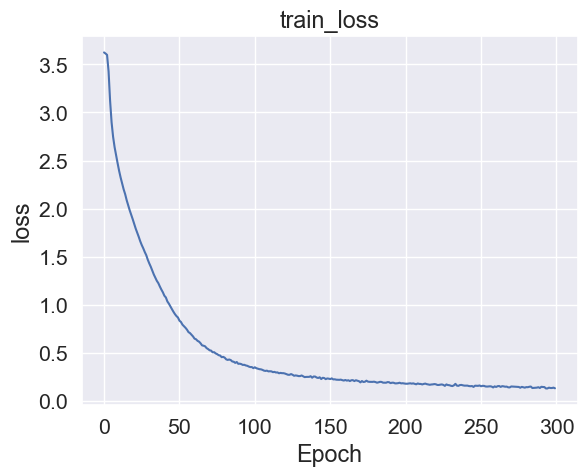

In [10]:
'模型概況'
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(history.history["loss"])
#scores = model.evaluate(test_images, test_labels)  
#print('test:',result[1])

In [11]:
'預測'
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

19/19 [==============================] - 1s 7ms/step


In [12]:
'混淆矩陣'
CM = confusion_matrix(test_labels, pred_labels)
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 
print(accuracy(CM))

0.41450777202072536


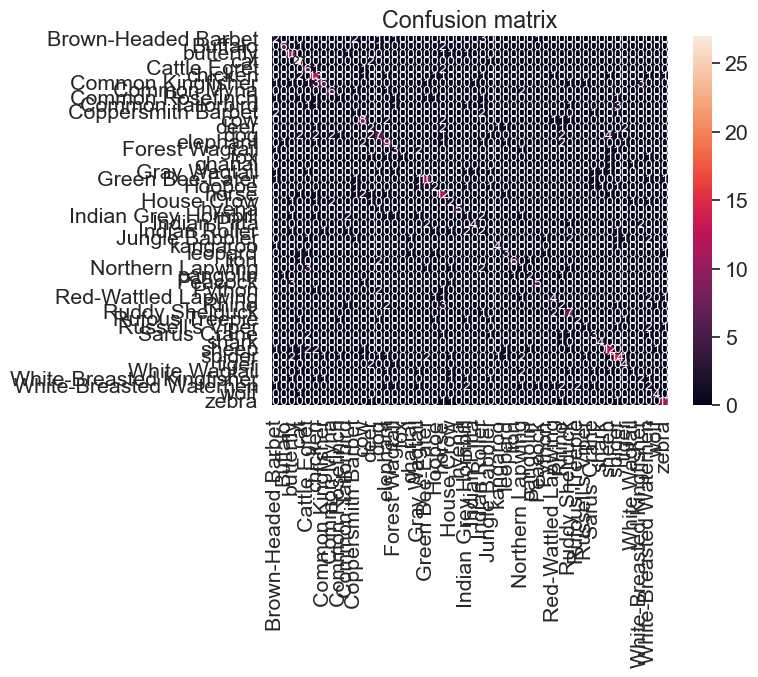

In [13]:
'混淆矩陣視覺化，看錯誤'
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [14]:
'存模型&讀模型'
from keras.models import load_model
model.save("31003-02_model")

INFO:tensorflow:Assets written to: 31003-02_model\assets


INFO:tensorflow:Assets written to: 31003-02_model\assets
